# 피의자, 피해자 데이터 생성
## 시+나이 별

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import os
import glob
folders_1 = os.listdir('data/금융사기용의자의 연령대별 지역데이터')
folders_2 = os.listdir('data/금융사기피해자의 연령대별 지역데이터')

def make_csv(folders,folderpath):
    with open(folderpath[:-1]+'.csv', 'w',encoding='UTF-8') as outfile:
        for filename in folders:
            with open(folderpath+filename, encoding='UTF-8') as file:        
                outfile.write(file.read())


make_csv(folders_1,"data/금융사기용의자의 연령대별 지역데이터/")
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
make_csv(folders_2,'data/금융사기피해자의 연령대별 지역데이터/')
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)

In [3]:
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
## 지역별 시구군
seoul = '종로구 중구 용산구 성동구 광진구 동대문구 중랑구 성북구 강북구 도봉구 노원구 은평구 서대문구 마포구 양천구 강서구 구로구 금천구 영등포구 동작구 관악구 서초구 강남구 송파구 강동구'.split(' ')
busan = '중구 서구 동구 영도구 부산진구 동래구 남구 북구 강서구 해운대구 사하구 금정구 연제구 수영구 사상구 기장군'.split(' ')
daegu = '중구 동구 서구 남구 북구 수성구 달서구 달성군'.split(' ')
incheon = '중구 동구 미추홀구 연수구 남동구 부평구 계양구 서구 강화군 옹진군'.split(' ')
gwangju = '동구 서구 남구 북구 광산구'.split(' ')
daejun = '동구 중구 서구 유성구 대덕구'.split(' ')
ulsan = '중구 남구 동구 북구 울주군'.split(' ')
gg = '남양주시 수원시 성남시 의정부시 안양시 부천시 광명시 동두천시 평택시 안산시 고양시 과천시 구리시 오산시 시흥시 군포시 의왕시 하남시 용인시 파주시 이천시 안성시 김포시 화성시 광주시 양주시 포천시 여주시 연천군 가평군 양평군'.split(' ')
gangwon = '춘천시 원주시 강릉시 동해시 태백시 속초시 삼척시 홍천군 횡성군 영월군 평창군 정선군 철원군 화천군 양구군 인제군 고성군 양양군'.split(' ')
chungbuk='청주시 충주시 제천시 보은군 옥천군 영동군 증평군 진천군 괴산군 음성군 단양군'.split(' ')
chungnam='천안시 공주시 보령시 아산시 서산시 논산시 계룡시 당진시 금산군 부여군 서천군 청양군 홍성군 예산군 태안군'.split(' ')
jeonbuk='전주시 군산시 익산시 정읍시 남원시 김제시 완주군 진안군 무주군 장수군 임실군 순창군 고창군 부안군'.split(' ')
jeonnam='목포시 여수시 순천시 나주시 광양시 담양군 곡성군 구례군 고흥군 보성군 화순군 장흥군 강진군 해남군 영암군 무안군 함평군 영광군 장성군 완도군 진도군 신안군'.split(' ')
geonbuk='포항시 경주시 김천시 안동시 구미시 영주시 영천시 상주시 문경시 경산시 군위군 의성군 청송군 영양군 영덕군 청도군 고령군 성주군 칠곡군 예천군 봉화군 울진군 울릉군'.split(' ')
geonnam ='창원시 진주시 통영시 사천시 김해시 밀양시 거제시 양산시 의령군 함안군 창녕군 고성군 남해군 하동군 산청군 함양군 거창군 합천군'.split(' ')
jeju='제주시 서귀포시'.split(' ')
sejong = '세종시'.split(' ')
all_region = seoul+ busan +daegu +incheon+gwangju+daejun+ulsan+gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju+sejong
part = gg+gangwon+chungbuk+chungnam+jeonbuk+jeonnam+geonbuk+geonnam+jeju
def delete_detail_region(region):
    region = str(region)
    if len(region) > 4:
        region=region[0:3]
        for i in all_region:
            if i in region:
                return i
            else:
                return region
    else:
        return region

df_suspect_origin['법정시군구명']=df_suspect_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))
df_victim_origin['법정시군구명']=df_victim_origin['법정시군구명'].apply(lambda x: delete_detail_region(x))

a = list(df_victim_origin['생년구간'].unique()) #2090-2100 2070-2080 => 각각 1개 5개 제외
a.remove ('2090-2100')
a.remove('2070-2080')
a= sorted(a)


b = list(df_suspect_origin['생년구간'].unique()) # 2080-2090 => 1개 제외
b.remove('2080-2090')
b = sorted(b)

region_s = [seoul,busan,daegu,incheon,gwangju,daejun,ulsan,gg ,gangwon ,chungbuk,chungnam,jeonbuk,jeonnam,geonbuk,geonnam ,jeju, sejong]
region_b = ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','세종특별자치시']
region = []
DF = []
for b in range(17):
    for s in region_s[b]:
        DF.append ([region_b[b],s])
        for old in a: # a로 들어가야 전부 들어감
            region.append([region_b[b],s,old])

#DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)
#suspect_DF = DF
#victim_DF = DF

DF = pd.DataFrame(columns=['광역시도명','법정시군구명'], data=DF)                   

suspect_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
victim_Old_DF = pd.DataFrame(columns=['광역시도명','법정시군구명','생년구간'], data=region)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')


def return_cnt(df,row):
    temp = df[(df['광역시도명']==row['광역시도명'])&(df['법정시군구명']==row['법정시군구명'])&(df['생년구간']==row['생년구간'])]
    return temp['광역시도명'].count()

suspect_Old_DF['발생건수'] = suspect_Old_DF.apply(lambda x: return_cnt(df_suspect_origin,x),axis=1)
victim_Old_DF['발생건수'] = victim_Old_DF.apply(lambda x: return_cnt(df_victim_origin,x),axis=1)
suspect_Old_DF.to_csv("suspect_Old_DF.csv", mode='w')
victim_Old_DF.to_csv("victim_Old_DF.csv", mode='w')

# 준비과정 1
## 함수 (makecity, makecity2)
## 서울, 부산, 대구, 인천, 광주, 대전, 울산 자르기
## 자르고 광역시도명	법정시군구명으로 구분

In [4]:
def makecity(row):
    if '서울' in row: 
        return '서울특별시'
    elif '부산' in row:
        return '부산광역시'
    elif '대구' in row:
        return '대구광역시'
    elif '인천' in row:
        return '인천광역시'
    elif '광주' in row:
        return '광주광역시'   
    elif '대전' in row:
        return '대전광역시'        
    elif '울산' in row:
        return '울산광역시'
    else:
        return row
def makecity2(row):
    if '서울' in row: 
        temp=row.replace('서울','')
        return temp.strip()
    elif '부산' in row:
        temp=row.replace('부산','')
        return temp.strip()
    elif '대구' in row:
        temp=row.replace('대구','')
        return temp.strip()
    elif '인천' in row:
        temp=row.replace('인천','')
        return temp.strip()
    elif '광주' in row:
        temp=row.replace('광주','')
        return temp.strip()   
    elif '대전' in row:
        temp=row.replace('대전','')
        return temp.strip()        
    elif '울산' in row:
        temp=row.replace('울산','')
        return temp.strip()
    else:
        return row

# 준비과정2
## 생년구간과의 match만약 생년월일을 나이로 바꾸었을때
## 만나이는 계산불가능 따라서 일반 나이를 따름

## 2022년 기준으로

## 1. 1900~1910(포함안함)
## 2. 1910~1920(포함안함)

# 은

## 1. 113~122
## 2. 103~112
## 3. 93~102
## 4. 83~92 
## 5. 73~82
## 6. 63~72 
## 7. 53~62
## 8. 43~52 
## 9. 33~42
## 10. 23~32 
## 11. 13~22
## 12. 3~12 

In [5]:
def cut1(row):
    b=2022-int(row[0:4])
    a=2023-int(row[5:9])
    ans=str(a)+'-'+str(b)
    return ans 

In [6]:
suspect_Old_DF['나이구간']=suspect_Old_DF['생년구간'].apply(cut1)
victim_Old_DF['나이구간']=victim_Old_DF['생년구간'].apply(cut1)

In [7]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,나이구간
0,서울특별시,종로구,1900-1910,0,113-122
1,서울특별시,종로구,1910-1920,0,103-112
2,서울특별시,종로구,1920-1930,0,93-102
3,서울특별시,종로구,1930-1940,0,83-92
4,서울특별시,종로구,1940-1950,1,73-82
...,...,...,...,...,...
2743,세종특별자치시,세종시,1970-1980,0,43-52
2744,세종특별자치시,세종시,1980-1990,0,33-42
2745,세종특별자치시,세종시,1990-2000,0,23-32
2746,세종특별자치시,세종시,2000-2010,0,13-22


In [8]:
victim_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,나이구간
0,서울특별시,종로구,1900-1910,0,113-122
1,서울특별시,종로구,1910-1920,0,103-112
2,서울특별시,종로구,1920-1930,0,93-102
3,서울특별시,종로구,1930-1940,0,83-92
4,서울특별시,종로구,1940-1950,1,73-82
...,...,...,...,...,...
2743,세종특별자치시,세종시,1970-1980,0,43-52
2744,세종특별자치시,세종시,1980-1990,0,33-42
2745,세종특별자치시,세종시,1990-2000,0,23-32
2746,세종특별자치시,세종시,2000-2010,0,13-22


# 이런경우 있을 수 있다!
# 스마트치안데이터의 나이 구간이 3~12인데
# 붙이는 데이터는 10~14이다.
# 이런경우 붙이는 데이터의 나이의 중앙값을 나이로 보고 붙인다.

# 준비과정3
## 세종시 제거
## 피의자 피해자 모두 세종시는 발생건수가 0임

In [9]:
suspect_Old_DF=suspect_Old_DF[suspect_Old_DF['법정시군구명']!='세종시']
victim_Old_DF=victim_Old_DF[victim_Old_DF['법정시군구명']!='세종시']

In [10]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,나이구간
0,서울특별시,종로구,1900-1910,0,113-122
1,서울특별시,종로구,1910-1920,0,103-112
2,서울특별시,종로구,1920-1930,0,93-102
3,서울특별시,종로구,1930-1940,0,83-92
4,서울특별시,종로구,1940-1950,1,73-82
...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,43-52
2732,제주특별자치도,서귀포시,1980-1990,7,33-42
2733,제주특별자치도,서귀포시,1990-2000,26,23-32
2734,제주특별자치도,서귀포시,2000-2010,29,13-22


In [11]:
victim_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,나이구간
0,서울특별시,종로구,1900-1910,0,113-122
1,서울특별시,종로구,1910-1920,0,103-112
2,서울특별시,종로구,1920-1930,0,93-102
3,서울특별시,종로구,1930-1940,0,83-92
4,서울특별시,종로구,1940-1950,1,73-82
...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,40,43-52
2732,제주특별자치도,서귀포시,1980-1990,103,33-42
2733,제주특별자치도,서귀포시,1990-2000,157,23-32
2734,제주특별자치도,서귀포시,2000-2010,205,13-22


# 1. 등록된 외국인(합법) : 2021년

In [12]:
le_foreign=pd.read_csv('데이터/시+나이/시군구별_및_연령별_등록외국인_현황_20230508231307(2021).csv',encoding='cp949')

In [13]:
le_foreign.iloc[3:,]

,행정구역(시군구)별(1),성별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17
3,총계,여자,483425,14864,13526,8400,11826,68497,64907,63961,54312,38671,33684,39190,44173,16773,6596,2244,790,1011
4,서울특별시,계,226569,5506,6051,4161,6309,35097,28422,23824,21095,16343,15710,20315,25459,10308,4776,1768,656,769
5,서울특별시,남자,103937,2804,3077,2144,2384,11482,10913,11150,10884,8627,8321,10275,12564,5087,2496,1013,363,353
6,서울특별시,여자,122632,2702,2974,2017,3925,23615,17509,12674,10211,7716,7389,10040,12895,5221,2280,755,293,416
7,부산광역시,계,39420,499,450,324,899,8008,7501,6481,5102,3169,2186,1775,1448,787,428,185,83,95
8,부산광역시,남자,21690,269,212,170,380,3779,4251,3972,3166,1949,1200,836,676,404,217,106,60,43
9,부산광역시,여자,17730,230,238,154,519,4229,3250,2509,1936,1220,986,939,772,383,211,79,23,52
10,대구광역시,계,27230,528,438,308,614,5903,4419,4402,3402,2182,1604,1425,1079,482,226,102,48,68
11,대구광역시,남자,14269,249,197,155,294,2928,2353,2456,1950,1203,846,698,476,238,115,55,27,29
12,대구광역시,여자,12961,279,241,153,320,2975,2066,1946,1452,979,758,727,603,244,111,47,21,39


In [14]:
le_foreign=le_foreign.iloc[3:,:]

In [15]:
le_foreign=le_foreign[le_foreign['성별(1)']=='계']

In [16]:
le_foreign

,행정구역(시군구)별(1),성별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17
4,서울특별시,계,226569,5506,6051,4161,6309,35097,28422,23824,21095,16343,15710,20315,25459,10308,4776,1768,656,769
7,부산광역시,계,39420,499,450,324,899,8008,7501,6481,5102,3169,2186,1775,1448,787,428,185,83,95
10,대구광역시,계,27230,528,438,308,614,5903,4419,4402,3402,2182,1604,1425,1079,482,226,102,48,68
13,인천광역시,계,66364,3267,2775,1632,1430,5514,7587,10309,9618,6164,4551,4658,4919,2221,987,426,161,145
16,광주광역시,계,20934,596,515,326,556,4837,4079,3088,2172,1375,1076,950,842,316,121,37,23,25
19,대전광역시,계,17292,391,263,168,860,4486,3058,2426,1631,1083,780,815,730,337,160,64,20,20
22,울산광역시,계,16827,408,384,244,197,1578,2544,3007,2463,1548,1173,1318,1215,455,169,72,18,34
25,세종특별자치시,계,4884,80,79,36,164,854,1038,742,642,365,263,235,251,93,27,13,1,1
28,경기도,계,360412,13005,11121,6338,5232,26058,49069,58340,50550,34022,26263,29264,33004,10982,4601,1596,493,474
31,강원도,계,17384,172,142,111,394,3054,3684,2743,2197,1416,953,969,871,381,143,68,49,37


### 나이구간이 서로 맞지 않기에 붙이는 데이터 구간의 중앙값을 나이로 본다.
#### 0: 0-4
#### 5: 5-9

In [17]:
le_foreign.rename(columns={'2021.1':2, '2021.2':7, '2021.3':12, '2021.4':17, '2021.5':22, '2021.6':27,'2021.7':32, '2021.8':37, 
                           '2021.9':42, '2021.10':47, '2021.11':52, '2021.12':57, '2021.13':62, '2021.14':67, '2021.15':72, '2021.16':77, '2021.17':82}, inplace=True)

In [18]:
le_foreign

,행정구역(시군구)별(1),성별(1),2021,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82
4,서울특별시,계,226569,5506,6051,4161,6309,35097,28422,23824,21095,16343,15710,20315,25459,10308,4776,1768,656,769
7,부산광역시,계,39420,499,450,324,899,8008,7501,6481,5102,3169,2186,1775,1448,787,428,185,83,95
10,대구광역시,계,27230,528,438,308,614,5903,4419,4402,3402,2182,1604,1425,1079,482,226,102,48,68
13,인천광역시,계,66364,3267,2775,1632,1430,5514,7587,10309,9618,6164,4551,4658,4919,2221,987,426,161,145
16,광주광역시,계,20934,596,515,326,556,4837,4079,3088,2172,1375,1076,950,842,316,121,37,23,25
19,대전광역시,계,17292,391,263,168,860,4486,3058,2426,1631,1083,780,815,730,337,160,64,20,20
22,울산광역시,계,16827,408,384,244,197,1578,2544,3007,2463,1548,1173,1318,1215,455,169,72,18,34
25,세종특별자치시,계,4884,80,79,36,164,854,1038,742,642,365,263,235,251,93,27,13,1,1
28,경기도,계,360412,13005,11121,6338,5232,26058,49069,58340,50550,34022,26263,29264,33004,10982,4601,1596,493,474
31,강원도,계,17384,172,142,111,394,3054,3684,2743,2197,1416,953,969,871,381,143,68,49,37


In [19]:
le_foreign[2]=le_foreign[2].astype(int)
le_foreign[7]=le_foreign[7].astype(int)
le_foreign[12]=le_foreign[12].astype(int)
le_foreign[17]=le_foreign[17].astype(int)
le_foreign[22]=le_foreign[22].astype(int)
le_foreign[27]=le_foreign[27].astype(int)
le_foreign[32]=le_foreign[32].astype(int)
le_foreign[37]=le_foreign[37].astype(int)
le_foreign[42]=le_foreign[42].astype(int)
le_foreign[47]=le_foreign[47].astype(int)
le_foreign[52]=le_foreign[52].astype(int)
le_foreign[57]=le_foreign[57].astype(int)
le_foreign[62]=le_foreign[62].astype(int)
le_foreign[67]=le_foreign[67].astype(int)
le_foreign[72]=le_foreign[72].astype(int)
le_foreign[77]=le_foreign[77].astype(int)
le_foreign[82]=le_foreign[82].astype(int)

In [20]:
le_foreign.head(3)

,행정구역(시군구)별(1),성별(1),2021,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82
4,서울특별시,계,226569,5506,6051,4161,6309,35097,28422,23824,21095,16343,15710,20315,25459,10308,4776,1768,656,769
7,부산광역시,계,39420,499,450,324,899,8008,7501,6481,5102,3169,2186,1775,1448,787,428,185,83,95
10,대구광역시,계,27230,528,438,308,614,5903,4419,4402,3402,2182,1604,1425,1079,482,226,102,48,68


In [21]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,나이구간
0,서울특별시,종로구,1900-1910,0,113-122
1,서울특별시,종로구,1910-1920,0,103-112
2,서울특별시,종로구,1920-1930,0,93-102
3,서울특별시,종로구,1930-1940,0,83-92
4,서울특별시,종로구,1940-1950,1,73-82
...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,43-52
2732,제주특별자치도,서귀포시,1980-1990,7,33-42
2733,제주특별자치도,서귀포시,1990-2000,26,23-32
2734,제주특별자치도,서귀포시,2000-2010,29,13-22


In [22]:
def make_foreigner(row, le_foreign):
    df=le_foreign[le_foreign['행정구역(시군구)별(1)']==row.광역시도명]
    
    target=row.나이구간

    standard=target.find('-')
    standard=target[standard+1:]
    standard=int(standard)

    if(standard>=82):
        return df[82].values[0]
    elif(standard>=77):
        return df[77].values[0]
    elif(standard>=72):
        return df[72].values[0]
    elif(standard>=67):
        return df[67].values[0]
    elif(standard>=62):
        return df[62].values[0]
    elif(standard>=57):
        return df[57].values[0]
    elif(standard>=52):
        return df[52].values[0]
    elif(standard>=47):
        return df[47].values[0]
    elif(standard>=42):
        return df[42].values[0]
    elif(standard>=37):
        return df[37].values[0]
    elif(standard>=32):
        return df[32].values[0]
    elif(standard>=27):
        return df[27].values[0]
    elif(standard>=22):
        return df[22].values[0]
    elif(standard>=17):
        return df[17].values[0]
    elif(standard>=12):
        return (df[12].values[0]+df[7].values[0]+df[2].values[0])

    
suspect_Old_DF['외국인등록수']=suspect_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)
victim_Old_DF['외국인등록수']=victim_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2992471432.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['외국인등록수']=suspect_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2992471432.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['외국인등록수']=victim_Old_DF.apply(lambda x: make_foreigner(x,le_foreign), axis=1)


In [23]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수
발생건수,1.000000,0.734245
외국인등록수,0.734245,1.000000


In [24]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수
발생건수,1.000000,0.829434
외국인등록수,0.829434,1.000000


# 2. 지역 및 연령별한국국적이 없는 외국인(남,여 통합)
## 1. 외국인 근로자
## 2. 결혼이민자
## 3. 유학생
## 4. 외국국적동포
## 5. 기타
## 6. 한국국적없는외국인 총합
## 7. 한국국적취득한 외국인
## 주의!:  *은 5명미만인 경우

In [25]:
no_korean = pd.read_csv("./데이터/시+나이/시군구별_연령별__외국인_주민현황_계__20230510221509(2021).csv", encoding='cp949')

# 데이터 클리닝작업 총계같은거 제거

In [26]:
no_korean=no_korean.iloc[11:,:9]

In [27]:
no_korean

,행정구역(시군구)별(1),연령별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
11,서울특별시,계,347080,49668,31098,51854,103128,111332,44768
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [28]:
no_korean=no_korean[no_korean['연령별(1)']!='계']

In [29]:
no_korean

,행정구역(시군구)별(1),연령별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [30]:
no_korean.rename(columns={'행정구역(시군구)별(1)':'광역시도명', '연령별(1)':'연령', '2021':'총계', '2021.1':'외국인근로자', '2021.2':'결혼이민자', '2021.3':'유학생', '2021.4':'외국인국적동포',
                         '2021.5':'기타외국인', '2021.6':'한국국적취득외국인'},inplace=True)

C:\Users\Tony\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### * 처리(5명미만) 2로 채움 1, 2, 3, 4 중 중앙값인

In [31]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,0 - 9세,14360,*,*,*,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,*,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,*,599,349,135


In [32]:
def change_star(row):
    if row=="*":
        return 2
    else:
        return row
no_korean['외국인근로자']=no_korean['외국인근로자'].apply(change_star)
no_korean['결혼이민자']=no_korean['결혼이민자'].apply(change_star)
no_korean['유학생']=no_korean['유학생'].apply(change_star)
no_korean['외국인국적동포']=no_korean['외국인국적동포'].apply(change_star)
no_korean['기타외국인']=no_korean['기타외국인'].apply(change_star)
no_korean['한국국적취득외국인']=no_korean['한국국적취득외국인'].apply(change_star)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\1332579930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['외국인근로자']=no_korean['외국인근로자'].apply(change_star)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\1332579930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['결혼이민자']=no_korean['결혼이민자'].apply(change_star)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\1332579930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [33]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,0 - 9세,14360,2,2,2,307,14052,1219
13,서울특별시,10 - 19세,11418,212,6,3835,554,6811,1982
14,서울특별시,20 - 29세,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,30 - 39세,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,40 - 49세,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,30 - 39세,8309,3639,1271,151,443,2805,973
160,제주특별자치도,40 - 49세,4749,1692,708,5,358,1986,556
161,제주특별자치도,50 - 59세,2242,327,233,2,445,1236,300
162,제주특별자치도,60 - 69세,1078,50,79,2,599,349,135


### no_korean 연령별 구간의 중앙값 형태로 바꿔주기, 70제외

In [34]:
def change_old2(row):
    if int(row[0])==0:
        return 5
    elif int(row[0:2])==70:
        return 70
    else:
        return int(row[0:2])+5

no_korean['연령']=no_korean['연령'].apply(change_old2)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2641132532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_korean['연령']=no_korean['연령'].apply(change_old2)


In [35]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,5,14360,2,2,2,307,14052,1219
13,서울특별시,15,11418,212,6,3835,554,6811,1982
14,서울특별시,25,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,35,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,45,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,35,8309,3639,1271,151,443,2805,973
160,제주특별자치도,45,4749,1692,708,5,358,1986,556
161,제주특별자치도,55,2242,327,233,2,445,1236,300
162,제주특별자치도,65,1078,50,79,2,599,349,135


### suspect, victim 나이 동기화 합칠 데이터에 동기화
### 광역시도명, 법정시군구명, 나이는 victim이나 suspect나 똑같음
### 아무거나 기준으로 카피해서 그거로 동기화 하면됨

In [36]:
suspect_Old_DF.head(3)

,광역시도명,법정시군구명,생년구간,발생건수,나이구간,외국인등록수
0,서울특별시,종로구,1900-1910,0,113-122,769
1,서울특별시,종로구,1910-1920,0,103-112,769
2,서울특별시,종로구,1920-1930,0,93-102,769


In [37]:
tempdf=suspect_Old_DF.copy()

In [38]:
def synchronization(row):
    st=row.find('-')
    st=row[:st]
    st=int(st)
    if st >=70:
        return 70
    elif st >= 65:
        return 65
    elif st >= 55:
        return 55
    elif st >= 45:
        return 45
    elif st >= 35:
        return 35
    elif st >= 25:
        return 25
    elif st >= 15:
        return 15
    else:
        return 5
tempdf['나이구간']=suspect_Old_DF['나이구간'].apply(synchronization)

In [39]:
no_korean

,광역시도명,연령,총계,외국인근로자,결혼이민자,유학생,외국인국적동포,기타외국인,한국국적취득외국인
12,서울특별시,5,14360,2,2,2,307,14052,1219
13,서울특별시,15,11418,212,6,3835,554,6811,1982
14,서울특별시,25,75599,6468,3675,43253,7613,14590,2557
15,서울특별시,35,70484,9994,10965,4278,17895,27352,8539
16,서울특별시,45,51505,9500,7952,402,13979,19672,9846
...,...,...,...,...,...,...,...,...,...
159,제주특별자치도,35,8309,3639,1271,151,443,2805,973
160,제주특별자치도,45,4749,1692,708,5,358,1986,556
161,제주특별자치도,55,2242,327,233,2,445,1236,300
162,제주특별자치도,65,1078,50,79,2,599,349,135


In [40]:
tempdf

,광역시도명,법정시군구명,생년구간,발생건수,나이구간,외국인등록수
0,서울특별시,종로구,1900-1910,0,70,769
1,서울특별시,종로구,1910-1920,0,70,769
2,서울특별시,종로구,1920-1930,0,70,769
3,서울특별시,종로구,1930-1940,0,70,769
4,서울특별시,종로구,1940-1950,1,70,769
...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,35,1126
2732,제주특별자치도,서귀포시,1980-1990,7,25,2310
2733,제주특별자치도,서귀포시,1990-2000,26,15,3531
2734,제주특별자치도,서귀포시,2000-2010,29,5,2199


In [41]:
def make_no_korean(row, no_korean, options):
   
    df=no_korean[(no_korean['광역시도명']==row.광역시도명) & (no_korean['연령']==row.나이구간)]
    return int(df[options].values[0])


In [42]:
suspect_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
suspect_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
suspect_Old_DF['국적없는유학생']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '유학생'),axis=1)
suspect_Old_DF['국적없는외국인국적동포']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인국적동포'),axis=1)
suspect_Old_DF['국적없는기타외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '기타외국인'),axis=1)
suspect_Old_DF['한국국적취득외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '한국국적취득외국인'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3706915367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3706915367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3706915367.py:3: SettingWithCopyWarning: 

In [43]:
victim_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
victim_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
victim_Old_DF['국적없는유학생']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '유학생'),axis=1)
victim_Old_DF['국적없는외국인국적동포']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인국적동포'),axis=1)
victim_Old_DF['국적없는기타외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '기타외국인'),axis=1)
victim_Old_DF['한국국적취득외국인']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '한국국적취득외국인'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3508055117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['국적없는외국인근로자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '외국인근로자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3508055117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['국적없는결혼이민자']=tempdf.apply( lambda x: make_no_korean(x, no_korean, '결혼이민자'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3508055117.py:3: SettingWithCopyWarning: 
A

In [44]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000


In [45]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000


# 3. 시도 나이별 혼인율(남여 합) 2022

In [46]:
marry=pd.read_csv("./데이터/시+나이/시도_성_연령별_혼인율_20230508232935(2022).csv", encoding='cp949')

In [47]:
marry=marry.iloc[15:,:]

In [48]:
marry['2022']=marry['2022'].astype(float)
marry['2022.1']=marry['2022.1'].astype(float)

In [49]:
marry['혼인율']=marry['2022']+marry['2022.1']

In [50]:
marry.columns

Index(['시도별', '연령별', '2022', '2022.1', '혼인율'], dtype='object')

In [51]:
marry.rename(columns={'시도별':'광역시도명','연령별':'연령'},inplace=True)

### 55세이상이 열은 지워준다(필요없음)
### 전부 중앙값으로 바꿔준다.(75제외)

In [52]:
marry=marry[marry['연령']!='55세이상']

In [53]:
def change_age(row):
    if int(row[0:2])==75:
        return 75
    else:
        return int(row[0:2])+2

In [54]:
marry['연령']=marry['연령'].apply(change_age)

In [55]:
marry

,광역시도명,연령,2022,2022.1,혼인율
15,서울특별시,17,0.1,0.2,0.3
16,서울특별시,22,1.5,3.2,4.7
17,서울특별시,27,14.6,24.8,39.4
18,서울특별시,32,39.0,40.7,79.7
19,서울특별시,37,23.6,16.5,40.1
...,...,...,...,...,...
248,제주특별자치도,57,4.1,3.0,7.1
249,제주특별자치도,62,2.8,1.6,4.4
250,제주특별자치도,67,1.8,0.9,2.7
251,제주특별자치도,72,1.0,0.4,1.4


### 나이 동기화(5단위로 75까지)

In [56]:
tempdf2=suspect_Old_DF.copy()

In [57]:
def synchronization2(row):
    st=row.find('-')
    st=row[:st]
    st=int(st)
    if st >=75:
        return 75
    elif st >= 72:
        return 72
    elif st >= 67:
        return 67
    elif st >= 62:
        return 62
    elif st >= 57:
        return 57
    elif st >= 52:
        return 52
    elif st >= 47:
        return 47
    elif st >= 42:
        return 42
    elif st >= 37:
        return 37
    elif st >= 32:
        return 32
    elif st >= 27:
        return 27
    elif st >= 22:
        return 22
    elif st >= 17:
        return 17
    else:
        return 0
tempdf2['나이구간']=suspect_Old_DF['나이구간'].apply(synchronization2)

In [58]:
tempdf2

,광역시도명,법정시군구명,생년구간,발생건수,나이구간,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인
0,서울특별시,종로구,1900-1910,0,75,769,169,403,2,8828,1521,2716
1,서울특별시,종로구,1910-1920,0,75,769,169,403,2,8828,1521,2716
2,서울특별시,종로구,1920-1930,0,75,769,169,403,2,8828,1521,2716
3,서울특별시,종로구,1930-1940,0,75,769,169,403,2,8828,1521,2716
4,서울특별시,종로구,1940-1950,1,72,769,169,403,2,8828,1521,2716
...,...,...,...,...,...,...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,42,1126,3639,1271,151,443,2805,973
2732,제주특별자치도,서귀포시,1980-1990,7,32,2310,2751,602,1826,118,1358,283
2733,제주특별자치도,서귀포시,1990-2000,26,22,3531,14,2,53,12,581,94
2734,제주특별자치도,서귀포시,2000-2010,29,0,2199,2,2,2,2,1153,81


In [59]:
def make_marry(row, marry):
    if row.나이구간==0:
        return 0
    else:
        df=marry[(marry['광역시도명']==row.광역시도명)&(marry['연령']==row.나이구간)]
        return df['혼인율'].values[0]

In [60]:
suspect_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)
victim_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2181630074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2181630074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['혼인율']=tempdf2.apply(lambda x: make_marry(x,marry), axis=1)


In [61]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744,0.113763
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705
혼인율,0.113763,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000


In [62]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779,0.189909
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705
혼인율,0.189909,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000


# 4. 시 연령별 실업률(2022)
## -> 실업률은 1분기 2분기 3분기 4분기 데이터 평균

In [63]:
no_job = pd.read_csv('./데이터/시+나이/행정구역_시도__연령별_실업률_20230508235421(2022).csv', encoding='cp949')

In [64]:
no_job['실업률']=(no_job['2022.1/4']+no_job['2022.2/4']+no_job['2022.3/4']+no_job['2022.4/4'])/4

In [65]:
no_job=no_job.iloc[4:,:]

In [66]:
no_job.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'},inplace=True)

###  ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','세종특별자치시']
# 제주도 다름

In [67]:
def city_synchronization(row):
    if row=='제주도':
        return '제주특별자치도'
    else:
        return row

In [68]:
no_job['광역시도명']=no_job['광역시도명'].apply(city_synchronization)

###  계제외 + 나이 컬럼 재설정

In [69]:
no_job=no_job[no_job['연령']!='계']

In [70]:
no_job.head(3)

,광역시도명,연령,2022.1/4,2022.2/4,2022.3/4,2022.4/4,실업률
5,서울특별시,15 - 29세,7.4,7.0,6.2,6.5,6.775
6,서울특별시,30 - 59세,3.0,2.6,2.0,2.1,2.425
7,서울특별시,60세이상,6.5,3.7,2.3,2.0,3.625


In [71]:
no_job['연령'][5]

'15 - 29세'

In [72]:
def change_nojob_age(row):
    if int(row[0:2])==60:
        return 60
    else:
        return int(row[0:2])+(int(row[5:7])-int(row[0:2]))//2

In [73]:
no_job['연령']=no_job['연령'].apply(change_nojob_age)

In [74]:
no_job

,광역시도명,연령,2022.1/4,2022.2/4,2022.3/4,2022.4/4,실업률
5,서울특별시,22,7.4,7.0,6.2,6.5,6.775
6,서울특별시,44,3.0,2.6,2.0,2.1,2.425
7,서울특별시,60,6.5,3.7,2.3,2.0,3.625
9,부산광역시,22,8.0,7.0,6.2,6.1,6.825
10,부산광역시,44,1.8,2.3,2.4,2.1,2.150
11,부산광역시,60,5.0,2.1,1.6,2.6,2.825
13,대구광역시,22,6.6,8.1,5.5,7.4,6.900
14,대구광역시,44,2.2,2.3,2.1,1.8,2.100
15,대구광역시,60,4.5,2.6,1.6,3.1,2.950
17,인천광역시,22,7.3,7.1,6.5,5.9,6.700


### 나이 동기화(22이상, 44이상, 60이상)

In [75]:
tempdf3=suspect_Old_DF.copy()

In [76]:
def synchronization3(row):
    st=row.find('-')
    st=row[:st]
    st=int(st)
    
    if st >= 60:
        return 60
    elif st >= 44:
        return 44
    elif st >= 22:
        return 22
    else:
        return 0
tempdf3['나이구간']=suspect_Old_DF['나이구간'].apply(synchronization3)

### 합치기

In [77]:
tempdf3

,광역시도명,법정시군구명,생년구간,발생건수,나이구간,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율
0,서울특별시,종로구,1900-1910,0,60,769,169,403,2,8828,1521,2716,1.1
1,서울특별시,종로구,1910-1920,0,60,769,169,403,2,8828,1521,2716,1.1
2,서울특별시,종로구,1920-1930,0,60,769,169,403,2,8828,1521,2716,1.1
3,서울특별시,종로구,1930-1940,0,60,769,169,403,2,8828,1521,2716,1.1
4,서울특별시,종로구,1940-1950,1,60,769,169,403,2,8828,1521,2716,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,22,1126,3639,1271,151,443,2805,973,17.4
2732,제주특별자치도,서귀포시,1980-1990,7,22,2310,2751,602,1826,118,1358,283,79.5
2733,제주특별자치도,서귀포시,1990-2000,26,22,3531,14,2,53,12,581,94,9.9
2734,제주특별자치도,서귀포시,2000-2010,29,0,2199,2,2,2,2,1153,81,0.0


In [78]:
def make_no_job(row, no_job):
    if (row.나이구간==0):
        return 0
    else:
        df=no_job[(no_job['광역시도명']==row.광역시도명)&(no_job['연령']==row.나이구간)]
        return df['실업률'].values[0]

In [79]:
suspect_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)
victim_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\1775264935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\1775264935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['실업률']=tempdf3.apply(lambda x: make_no_job(x,no_job), axis=1)


In [80]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744,0.113763,0.032497
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596
혼인율,0.113763,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223
실업률,0.032497,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000


In [81]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779,0.189909,0.054620
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596
혼인율,0.189909,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223
실업률,0.054620,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000


# 5. 시 + 연령별 취업자(2022.01 ~ 2022.12) 평균

In [82]:
get_job = pd.read_csv("./데이터/시+나이/행정구역_시도__연령별_취업자_20230508235628(2022).csv", encoding='cp949')

In [83]:
get_job=get_job.iloc[10:,:]

In [84]:
get_job['취업자']=(get_job['2022.01']+get_job['2022.02']+get_job['2022.03']+get_job['2022.04']+get_job['2022.05']
+get_job['2022.06']+get_job['2022.07']+get_job['2022.08']+get_job['2022.09']+get_job['2022.10']+get_job['2022.11']+get_job['2022.12'])//12

In [85]:
get_job.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'}, inplace=True)

In [86]:
get_job=get_job[(get_job['연령']!='계')&(get_job['연령']!='15 - 64세')&(get_job['연령']!='15 - 24세')&(get_job['연령']!='15 - 29세')]

In [87]:
get_job['광역시도명']=get_job['광역시도명'].apply(city_synchronization)

In [88]:
get_job

,광역시도명,연령,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,취업자
11,서울특별시,15 - 19세,35,36,31,36,37,28,33,31,31,24,28,35,32
12,서울특별시,20 - 29세,880,877,873,877,875,871,867,873,860,843,837,839,864
13,서울특별시,30 - 39세,1157,1158,1158,1159,1156,1158,1161,1153,1152,1166,1173,1172,1160
14,서울특별시,40 - 49세,1113,1113,1113,1109,1120,1120,1112,1112,1111,1107,1121,1116,1113
15,서울특별시,50 - 59세,1082,1090,1104,1119,1121,1120,1121,1110,1115,1101,1105,1115,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,제주특별자치도,20 - 29세,45,45,43,43,44,46,46,48,50,50,50,48,46
173,제주특별자치도,30 - 39세,69,70,70,70,70,71,71,70,71,72,71,71,70
174,제주특별자치도,40 - 49세,95,94,96,93,93,96,95,95,94,96,96,96,94
175,제주특별자치도,50 - 59세,91,90,91,90,91,92,94,93,93,95,96,94,92


In [89]:
def change_job_age(row):
    if int(row[0:2])==60:
        return 60
    else:
        return int(row[0:2])+(int(row[5:7])-int(row[0:2]))//2
    

In [90]:
get_job['연령']=get_job['연령'].apply(change_job_age)

In [91]:
get_job

,광역시도명,연령,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,취업자
11,서울특별시,17,35,36,31,36,37,28,33,31,31,24,28,35,32
12,서울특별시,24,880,877,873,877,875,871,867,873,860,843,837,839,864
13,서울특별시,34,1157,1158,1158,1159,1156,1158,1161,1153,1152,1166,1173,1172,1160
14,서울특별시,44,1113,1113,1113,1109,1120,1120,1112,1112,1111,1107,1121,1116,1113
15,서울특별시,54,1082,1090,1104,1119,1121,1120,1121,1110,1115,1101,1105,1115,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,제주특별자치도,24,45,45,43,43,44,46,46,48,50,50,50,48,46
173,제주특별자치도,34,69,70,70,70,70,71,71,70,71,72,71,71,70
174,제주특별자치도,44,95,94,96,93,93,96,95,95,94,96,96,96,94
175,제주특별자치도,54,91,90,91,90,91,92,94,93,93,95,96,94,92


In [92]:
tempdf4 = suspect_Old_DF.copy()

In [93]:
def synchronization4(row):
    st=row.find('-')
    st=row[:st]
    st=int(st)
    if st >= 60:
        return 60
    elif st >= 54:
        return 54
    elif st >= 44:
        return 44
    elif st >= 34:
        return 34
    elif st >= 24:
        return 24
    elif st >= 17:
        return 17
    else:
        return 0
tempdf4['나이구간'] =  suspect_Old_DF['나이구간'].apply(synchronization4)

In [94]:
def make_get_job(row, get_job):
    if (row.나이구간==0):
        return 0
    else:
        df=get_job[(get_job['광역시도명']==row.광역시도명)&(get_job['연령']==row.나이구간)]
        return df['취업자'].values[0]

In [95]:
suspect_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)
victim_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2218844702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2218844702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['취업자']=tempdf4.apply(lambda x: make_get_job(x,get_job), axis=1)


In [96]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744,0.113763,0.032497,-0.471679
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678
혼인율,0.113763,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211
실업률,0.032497,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069


In [97]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779,0.189909,0.054620,-0.531345
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678
혼인율,0.189909,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211
실업률,0.054620,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069


# 6. 경제활동인구
## 1 경제활동인구(천명)
## 2 비경제활동인구(천명)
## 3 경제활동참가율(%)
## 4 고용률(%)

In [98]:
economic_activity = pd.read_csv("./데이터/시+나이/행정구역_시도__연령별_경제활동인구_20230511133323(2022).csv", encoding='cp949')

In [99]:
economic_activity

,시도별,연령계층별,2022.1/4,2022.1/4.1,2022.1/4.2,2022.1/4.3,2022.1/4.4,2022.2/4,2022.2/4.1,2022.2/4.2,...,2022.4/4,2022.4/4.1,2022.4/4.2,2022.4/4.3,2022.4/4.4,2023.1/4,2023.1/4.1,2023.1/4.2,2023.1/4.3,2023.1/4.4
0,시도별,연령계층별,15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),...,15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%),15세이상인구 (천명),경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%),고용률 (%)
1,계,계,45211,28360,16851,62.7,60.5,45242,29227,16015,...,45317,28957,16360,63.9,62.3,45358,28685,16673,63.2,61.2
2,계,15 - 19세,2259,211,2048,9.4,8.4,2243,198,2044,...,2240,161,2079,7.2,6.9,2260,189,2071,8.4,7.8
3,계,20 - 29세,6398,4053,2346,63.3,59.2,6350,4178,2172,...,6248,3987,2261,63.8,60.2,6211,3981,2230,64.1,59.8
4,계,30 - 39세,6900,5416,1484,78.5,76.5,6866,5463,1403,...,6830,5463,1367,80.0,78.0,6800,5446,1354,80.1,77.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,제주도,50 - 59세,112,91,21,81.3,80.9,113,91,21,...,114,95,18,83.9,83.2,114,94,21,81.9,81.1
177,제주도,60세이상,157,93,64,59.1,56.8,159,95,64,...,163,100,63,61.2,59.9,164,91,73,55.4,53.6
178,제주도,15 - 64세,462,346,116,74.9,73.4,463,347,116,...,463,361,102,77.9,76.3,464,348,116,75.0,73.0
179,제주도,15 - 24세,68,24,45,34.9,33.6,68,24,44,...,67,26,41,39.2,38.0,67,25,42,37.4,35.6


In [100]:
economic_activity.columns

Index(['시도별', '연령계층별', '2022.1/4', '2022.1/4.1', '2022.1/4.2', '2022.1/4.3',
       '2022.1/4.4', '2022.2/4', '2022.2/4.1', '2022.2/4.2', '2022.2/4.3',
       '2022.2/4.4', '2022.3/4', '2022.3/4.1', '2022.3/4.2', '2022.3/4.3',
       '2022.3/4.4', '2022.4/4', '2022.4/4.1', '2022.4/4.2', '2022.4/4.3',
       '2022.4/4.4', '2023.1/4', '2023.1/4.1', '2023.1/4.2', '2023.1/4.3',
       '2023.1/4.4'],
      dtype='object')

In [101]:
economic_activity=economic_activity.loc[1:,['시도별', '연령계층별','2022.1/4.1','2022.1/4.2', '2022.1/4.3',
       '2022.1/4.4', '2022.2/4.1', '2022.2/4.2','2022.2/4.3',
       '2022.2/4.4', '2022.3/4.1', '2022.3/4.2','2022.3/4.3',
       '2022.3/4.4', '2022.4/4.1', '2022.4/4.2', '2022.4/4.3',
       '2022.4/4.4']]

In [102]:
economic_activity['2022.1/4.1']=economic_activity['2022.1/4.1'].astype(float)
economic_activity['2022.1/4.2']=economic_activity['2022.1/4.3'].astype(float)
economic_activity['2022.1/4.3']=economic_activity['2022.1/4.3'].astype(float)
economic_activity['2022.1/4.4']=economic_activity['2022.1/4.4'].astype(float)
economic_activity['2022.2/4.1']=economic_activity['2022.2/4.1'].astype(float)
economic_activity['2022.2/4.2']=economic_activity['2022.2/4.1'].astype(float)
economic_activity['2022.2/4.3']=economic_activity['2022.2/4.3'].astype(float)
economic_activity['2022.2/4.4']=economic_activity['2022.2/4.4'].astype(float)
economic_activity['2022.3/4.1']=economic_activity['2022.3/4.1'].astype(float)
economic_activity['2022.3/4.2']=economic_activity['2022.3/4.1'].astype(float)
economic_activity['2022.3/4.3']=economic_activity['2022.3/4.3'].astype(float)
economic_activity['2022.3/4.4']=economic_activity['2022.3/4.4'].astype(float)
economic_activity['2022.4/4.1']=economic_activity['2022.4/4.1'].astype(float)
economic_activity['2022.4/4.2']=economic_activity['2022.4/4.1'].astype(float)
economic_activity['2022.4/4.3']=economic_activity['2022.4/4.3'].astype(float)
economic_activity['2022.4/4.4']=economic_activity['2022.4/4.4'].astype(float)

In [103]:
economic_activity['경제활동인구평균']=(economic_activity['2022.1/4.1']+economic_activity['2022.2/4.1']+economic_activity['2022.3/4.1']+
                                   economic_activity['2022.4/4.1'])/4
economic_activity['비경제활동인구평균']=(economic_activity['2022.1/4.2']+economic_activity['2022.2/4.2']+economic_activity['2022.3/4.2']+
                                   economic_activity['2022.4/4.2'])/4
economic_activity['경제활동참가율평균']=(economic_activity['2022.1/4.3']+economic_activity['2022.2/4.3']+economic_activity['2022.3/4.3']+
                                   economic_activity['2022.4/4.3'])/4

economic_activity['고용률평균']=(economic_activity['2022.1/4.4']+economic_activity['2022.2/4.4']+economic_activity['2022.3/4.4']+
                                   economic_activity['2022.4/4.4'])/4

In [104]:
economic_activity=economic_activity.loc[:,['시도별', '연령계층별', '경제활동인구평균','비경제활동인구평균', '경제활동참가율평균','고용률평균']]

In [105]:
economic_activity=economic_activity[economic_activity['시도별']!='계']

In [106]:
economic_activity=economic_activity[(economic_activity['연령계층별']!='계')&(economic_activity['연령계층별']!='15 - 64세')&(economic_activity['연령계층별']!='15 - 24세')&(economic_activity['연령계층별']!='15 - 29세')]

In [107]:
economic_activity.rename(columns={'시도별':'광역시도명', '연령계층별':'연령'}, inplace=True)

In [108]:
economic_activity['광역시도명'] = economic_activity['광역시도명'].apply(city_synchronization)

In [109]:
economic_activity

,광역시도명,연령,경제활동인구평균,비경제활동인구평균,경제활동참가율평균,고용률평균
12,서울특별시,15 - 19세,34.50,27.575,9.400,8.725
13,서울특별시,20 - 29세,927.00,707.500,67.525,63.000
14,서울특별시,30 - 39세,1194.75,916.400,82.350,79.975
15,서울특별시,40 - 49세,1141.50,874.450,79.275,77.350
16,서울특별시,50 - 59세,1131.50,868.975,75.650,74.125
...,...,...,...,...,...,...
173,제주특별자치도,20 - 29세,49.00,53.150,67.050,63.500
174,제주특별자치도,30 - 39세,72.75,76.075,86.800,84.025
175,제주특별자치도,40 - 49세,96.00,93.650,86.250,85.075
176,제주특별자치도,50 - 59세,92.75,90.325,82.300,81.775


In [110]:
economic_activity['연령'] = economic_activity['연령'].apply(change_job_age)

In [111]:
economic_activity

,광역시도명,연령,경제활동인구평균,비경제활동인구평균,경제활동참가율평균,고용률평균
12,서울특별시,17,34.50,27.575,9.400,8.725
13,서울특별시,24,927.00,707.500,67.525,63.000
14,서울특별시,34,1194.75,916.400,82.350,79.975
15,서울특별시,44,1141.50,874.450,79.275,77.350
16,서울특별시,54,1131.50,868.975,75.650,74.125
...,...,...,...,...,...,...
173,제주특별자치도,24,49.00,53.150,67.050,63.500
174,제주특별자치도,34,72.75,76.075,86.800,84.025
175,제주특별자치도,44,96.00,93.650,86.250,85.075
176,제주특별자치도,54,92.75,90.325,82.300,81.775


### 원데이터의 연령 동기화 하는 임시데이터

In [112]:
tempdf5 = suspect_Old_DF.copy()

In [113]:
tempdf5['나이구간']=tempdf5['나이구간'].apply(synchronization4)

In [114]:
def make_economic_activity(row, economic_activity, options):
    if (row.나이구간==0):
        return 0
    else:
        df=economic_activity[(economic_activity['광역시도명']==row.광역시도명) & (economic_activity['연령']==row.나이구간)]
        return df[options].values[0]

In [115]:
suspect_Old_DF['경제활동인구평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균'),axis=1)
suspect_Old_DF['경제활동참가율평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균'),axis=1)
suspect_Old_DF['고용률평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '고용률평균'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3535407797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['경제활동인구평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\3535407797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspect_Old_DF['경제활동참가율평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\35354

In [116]:
victim_Old_DF['경제활동인구평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균'),axis=1)
victim_Old_DF['경제활동참가율평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균'),axis=1)
victim_Old_DF['고용률평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '고용률평균'),axis=1)

C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2504971394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['경제활동인구평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동인구평균'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2504971394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_Old_DF['경제활동참가율평균']=tempdf5.apply(lambda x: make_economic_activity(x, economic_activity, '경제활동참가율평균'),axis=1)
C:\Users\Tony\AppData\Local\Temp\ipykernel_28332\2504971

In [117]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균,경제활동참가율평균,고용률평균
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744,0.113763,0.032497,-0.471679,-0.470825,-0.254168,-0.266797
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889,-0.325044,-0.200864,-0.221023
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586,0.463726,0.621637,0.603015
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593,0.644167,0.777729,0.764596
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130,-0.035251,0.455598,0.431612
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917,0.819078,0.462833,0.463785
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582,-0.015176,0.152304,0.134071
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678,0.329189,0.253775,0.241223
혼인율,0.113763,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211,0.231016,0.588986,0.568910
실업률,0.032497,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069,0.199530,0.284885,0.263824


In [118]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균,경제활동참가율평균,고용률평균
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779,0.189909,0.054620,-0.531345,-0.530585,-0.224421,-0.241082
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889,-0.325044,-0.200864,-0.221023
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586,0.463726,0.621637,0.603015
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593,0.644167,0.777729,0.764596
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130,-0.035251,0.455598,0.431612
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917,0.819078,0.462833,0.463785
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582,-0.015176,0.152304,0.134071
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678,0.329189,0.253775,0.241223
혼인율,0.189909,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211,0.231016,0.588986,0.568910
실업률,0.054620,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069,0.199530,0.284885,0.263824


# 발생건수와 상관관계가 높은 변수들 회귀분석(가설설정 & 검정)

# 생년구간을 dummy변수로

In [119]:
suspect_Old_DF=pd.get_dummies(suspect_Old_DF, columns = ['나이구간'])

In [120]:
victim_Old_DF=pd.get_dummies(victim_Old_DF, columns = ['나이구간'])

In [121]:
pd.set_option('display.max_columns', None)

In [122]:
suspect_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균,경제활동참가율평균,고용률평균,나이구간_103-112,나이구간_113-122,나이구간_13-22,나이구간_23-32,나이구간_3-12,나이구간_33-42,나이구간_43-52,나이구간_53-62,나이구간_63-72,나이구간_73-82,나이구간_83-92,나이구간_93-102
발생건수,1.000000,0.734245,0.041208,-0.186718,0.418311,-0.262766,0.491235,0.224744,0.113763,0.032497,-0.471679,-0.470825,-0.254168,-0.266797,-0.243886,-0.244172,0.377926,0.362452,0.220025,0.209480,0.107022,0.014807,-0.139188,-0.207788,-0.208698,-0.247980
외국인등록수,0.734245,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889,-0.325044,-0.200864,-0.221023,-0.276602,-0.276602,0.341728,0.363167,0.195823,0.276674,0.226243,0.092573,-0.113201,-0.276602,-0.276602,-0.276602
국적없는외국인근로자,0.041208,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586,0.463726,0.621637,0.603015,-0.133605,-0.133605,-0.358700,-0.032276,-0.358700,0.383366,0.411342,0.329888,0.293106,-0.133605,-0.133605,-0.133605
국적없는결혼이민자,-0.186718,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593,0.644167,0.777729,0.764596,-0.046455,-0.046455,-0.425329,-0.309008,-0.425329,0.342665,0.420553,0.342416,0.286306,-0.046455,-0.046455,-0.046455
국적없는유학생,0.418311,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130,-0.035251,0.455598,0.431612,-0.226193,-0.226193,-0.226193,0.389852,-0.226193,0.539889,0.409331,0.249441,-0.005160,-0.226193,-0.226193,-0.226193
국적없는외국인국적동포,-0.262766,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917,0.819078,0.462833,0.463785,0.068661,0.068661,-0.361748,-0.273285,-0.361748,0.014593,0.177054,0.205059,0.256768,0.068661,0.068661,0.068661
국적없는기타외국인,0.491235,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582,-0.015176,0.152304,0.134071,-0.269872,-0.269872,0.111937,0.006679,0.111937,0.260670,0.345981,0.294340,0.217815,-0.269872,-0.269872,-0.269872
한국국적취득외국인,0.224744,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678,0.329189,0.253775,0.241223,-0.149556,-0.149556,-0.098169,-0.014498,-0.098169,0.126587,0.376178,0.267025,0.188827,-0.149556,-0.149556,-0.149556
혼인율,0.113763,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211,0.231016,0.588986,0.568910,-0.161807,-0.161807,-0.436830,0.296889,-0.436830,0.480513,0.388835,0.231507,0.131160,-0.008017,-0.161807,-0.161807
실업률,0.032497,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069,0.199530,0.284885,0.263824,-0.011825,-0.011825,-0.436452,0.392807,-0.436452,0.392807,0.392807,-0.234568,-0.011825,-0.011825,-0.011825,-0.011825


In [123]:
victim_Old_DF.corr(method='spearman')

,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균,경제활동참가율평균,고용률평균,나이구간_103-112,나이구간_113-122,나이구간_13-22,나이구간_23-32,나이구간_3-12,나이구간_33-42,나이구간_43-52,나이구간_53-62,나이구간_63-72,나이구간_73-82,나이구간_83-92,나이구간_93-102
발생건수,1.000000,0.829434,0.127193,-0.124640,0.518593,-0.280102,0.602045,0.297779,0.189909,0.054620,-0.531345,-0.530585,-0.224421,-0.241082,-0.279761,-0.285785,0.384278,0.341292,0.274276,0.287695,0.183552,0.029066,-0.110869,-0.213585,-0.290261,-0.319899
외국인등록수,0.829434,1.000000,0.346250,0.059159,0.591296,-0.019143,0.805569,0.596518,0.308767,0.141460,-0.324889,-0.325044,-0.200864,-0.221023,-0.276602,-0.276602,0.341728,0.363167,0.195823,0.276674,0.226243,0.092573,-0.113201,-0.276602,-0.276602,-0.276602
국적없는외국인근로자,0.127193,0.346250,1.000000,0.914801,0.723096,0.664226,0.665879,0.758562,0.825293,0.525957,0.464586,0.463726,0.621637,0.603015,-0.133605,-0.133605,-0.358700,-0.032276,-0.358700,0.383366,0.411342,0.329888,0.293106,-0.133605,-0.133605,-0.133605
국적없는결혼이민자,-0.124640,0.059159,0.914801,1.000000,0.547095,0.751888,0.485309,0.649155,0.727659,0.443814,0.644593,0.644167,0.777729,0.764596,-0.046455,-0.046455,-0.425329,-0.309008,-0.425329,0.342665,0.420553,0.342416,0.286306,-0.046455,-0.046455,-0.046455
국적없는유학생,0.518593,0.591296,0.723096,0.547095,1.000000,0.158257,0.608517,0.505797,0.856820,0.633082,-0.036130,-0.035251,0.455598,0.431612,-0.226193,-0.226193,-0.226193,0.389852,-0.226193,0.539889,0.409331,0.249441,-0.005160,-0.226193,-0.226193,-0.226193
국적없는외국인국적동포,-0.280102,-0.019143,0.664226,0.751888,0.158257,1.000000,0.368850,0.683445,0.382742,0.227910,0.819917,0.819078,0.462833,0.463785,0.068661,0.068661,-0.361748,-0.273285,-0.361748,0.014593,0.177054,0.205059,0.256768,0.068661,0.068661,0.068661
국적없는기타외국인,0.602045,0.805569,0.665879,0.485309,0.608517,0.368850,1.000000,0.850537,0.456723,0.122923,-0.014582,-0.015176,0.152304,0.134071,-0.269872,-0.269872,0.111937,0.006679,0.111937,0.260670,0.345981,0.294340,0.217815,-0.269872,-0.269872,-0.269872
한국국적취득외국인,0.297779,0.596518,0.758562,0.649155,0.505797,0.683445,0.850537,1.000000,0.539705,0.258596,0.329678,0.329189,0.253775,0.241223,-0.149556,-0.149556,-0.098169,-0.014498,-0.098169,0.126587,0.376178,0.267025,0.188827,-0.149556,-0.149556,-0.149556
혼인율,0.189909,0.308767,0.825293,0.727659,0.856820,0.382742,0.456723,0.539705,1.000000,0.757223,0.230211,0.231016,0.588986,0.568910,-0.161807,-0.161807,-0.436830,0.296889,-0.436830,0.480513,0.388835,0.231507,0.131160,-0.008017,-0.161807,-0.161807
실업률,0.054620,0.141460,0.525957,0.443814,0.633082,0.227910,0.122923,0.258596,0.757223,1.000000,0.197069,0.199530,0.284885,0.263824,-0.011825,-0.011825,-0.436452,0.392807,-0.436452,0.392807,0.392807,-0.234568,-0.011825,-0.011825,-0.011825,-0.011825


# 붙인 변수들 시각화 (상관관계가 있는것들 0.3이상)
### 1) 외국인등록수 2) 국적없는유학생 3) 국적없는기타외국인 4) 취업자 5) 경제활동인구평균 6) 나이구간_13-22	7) 나이구간_23-32

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from scipy import stats
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1) 외국인 등록수

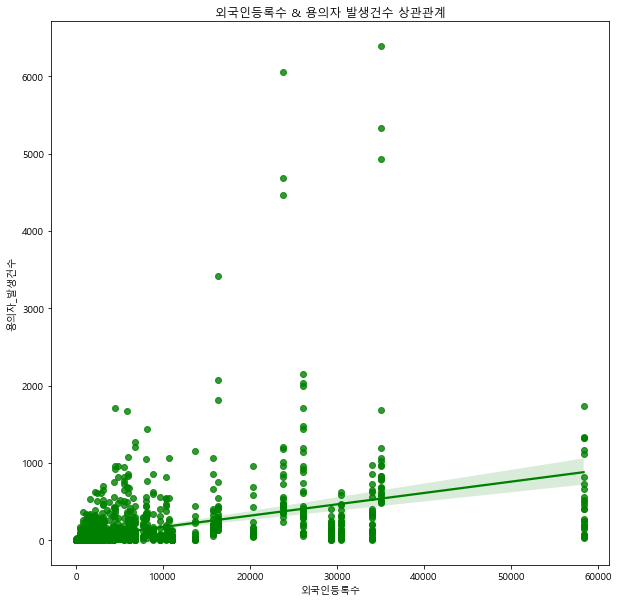

(0.4175761524552718, 6.4248142193841e-116)

In [211]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=victim_Old_DF['외국인등록수'], y=victim_Old_DF['발생건수'], fit_reg=True, color='g')
plt.xlabel('외국인등록수')
plt.ylabel('용의자_발생건수')
plt.title('외국인등록수 & 용의자 발생건수 상관관계')
plt.show()
stats.pearsonr(suspect_Old_DF['외국인등록수'], suspect_Old_DF['발생건수'])

# 2) 국적없는 유학생

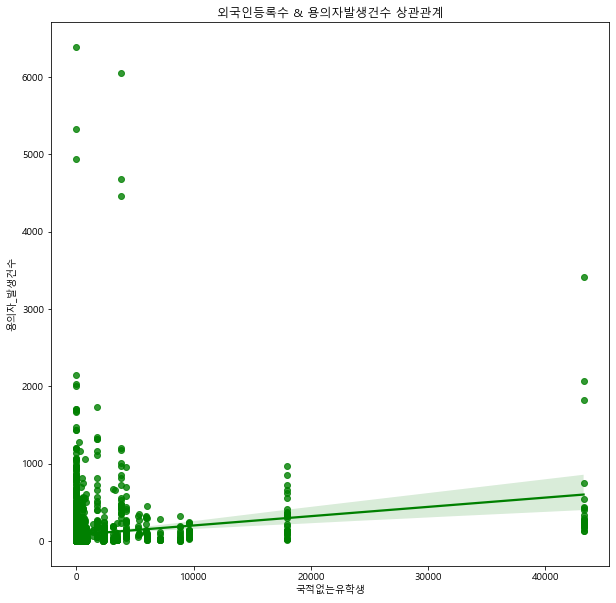

In [206]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=victim_Old_DF['국적없는유학생'], y=victim_Old_DF['발생건수'], fit_reg=True, color='g')
plt.xlabel('국적없는유학생')
plt.ylabel('용의자_발생건수')
plt.title('외국인등록수 & 용의자발생건수 상관관계')
plt.show()

## 독립변수(X)들 선정

## 상관관계의 기준은 0.1이상(총 6개)

## 피의자 : 1 생년구간new	2 외국인등록수 3 국적없는외국인근로자	4 국적없는결혼이민자	5 국적없는유학생 6국적없는기타외국인 7 혼인율 8취업자	9경제활동인구평균(천명) 10경제활동참가율평균(%)	11고용률평균(%)

## 피해자: 1 생년구간new	2 외국인등록수 3 국적없는외국인근로자 4 국적없는유학생 5 국적없는기타외국인 6 혼인율

## 피해자와 피의자는 국적없는결혼이민자에서 상관관계의 차이를 보였다.

# 1. 용의자

In [124]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [132]:
suspect_model=smf.ols(formula='발생건수~외국인등록수+국적없는외국인근로자+국적없는결혼이민자+국적없는유학생+국적없는외국인국적동포+국적없는기타외국인+한국국적취득외국인+혼인율+실업률+취업자+경제활동인구평균+경제활동참가율평균+고용률평균+ Q("나이구간_103-112")+ Q("나이구간_113-122")+ Q("나이구간_13-22")+ Q("나이구간_23-32")+ Q("나이구간_33-42")+ Q("나이구간_3-12")+ Q("나이구간_43-52")+ Q("나이구간_53-62")+ Q("나이구간_63-72")+ Q("나이구간_73-82")+ Q("나이구간_83-92")+ Q("나이구간_93-102")',data=suspect_Old_DF).fit()

In [133]:
suspect_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 26 May 2023   Prob (F-statistic):          1.37e-171
Time:                        01:25:21   Log-Likelihood:                -13917.
No. Observations:                2736   AIC:                         2.788e+04
Df Residuals:                    2711   BIC:                         2.803e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.6743     13.141      2.639      0.008       8.907      60.442
외국인등록수                0.0014      0.000      7.774      0.000       0.001       0.002
국적없는외국인근로자           -0.0004      0.000     -0.969      0.333      -0.001       0.000
국적없는결혼이민자            -0.0041      0.001     -3.261      0.001      -0.007      -0.002
국적없는유학생               0.0009      0.000      2.166      0.030    8.14e-05       0.002
국적없는외국인국적동포           0.0011      0.001      1.683      0.093      -0.000       0.002
국적없는기타외국인             0.0008      0.000      2.271      0.023       0.000       0.001
한국국적취득외국인          2.617e-05      0.002      0.017      0.987      -0.003       0.003
혼인율                  -3.9519      0.636     -6.216      0.000      -5.199      -2.705
실업률                   1.1592      2.208      0.525      0.600      -3.171       5.489
취업자                   0.2632      0.374      0.703      0.482      -0.471       0.997
경제활동인구평균             -0.2656      0.364     -0.729      0.466      -0.980       0.449
경제활동참가율평균            -0.4811      4.128     -0.117      0.907      -8.576       7.614
고용률평균                 0.6067      4.246      0.143      0.886      -7.719       8.933
Q("나이구간_103-112")   -38.5365      6.326     -6.092      0.000     -50.941     -26.132
Q("나이구간_113-122")   -38.5409      6.326     -6.092      0.000     -50.945     -26.136
Q("나이구간_13-22")       2.5079     13.356      0.188      0.851     -23.682      28.697
Q("나이구간_23-32")      22.5791      9.595      2.353      0.019       3.766      41.392
Q("나이구간_33-42")     267.0245     46.399      5.755      0.000     176.044     358.005
Q("나이구간_3-12")      -36.1985     13.386     -2.704      0.007     -62.446      -9.952
Q("나이구간_43-52")      12.4545     13.745      0.906      0.365     -14.496      39.405
Q("나이구간_53-62")     -15.1648      8.883     -1.707      0.088     -32.582       2.253
Q("나이구간_63-72")     -28.2649      5.290     -5.344      0.000     -38.637     -17.893
Q("나이구간_73-82")     -36.4596      6.072     -6.005      0.000     -48.366     -24.554
Q("나이구간_83-92")     -38.1637      6.326     -6.033      0.000     -50.568     -25.759
Q("나이구간_93-102")    -38.5628      6.326     -6.096      0.000     -50.967     -26.158
==============================================================================
Omnibus:                     4574.796   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3924539.818
Skew:                          11.082   Prob(JB):                         0.00
Kurtosis:                     187.213   Cond. No.                     3.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

# 후진제거법 사용
# 1 pvalue가 0.2넘어가는거 삭제
### 1 한국국적취득외국인
### 2 실업률
### 3 취업자
### 4 경제활동참가율평균
### 5 고용률평균
### 6 Q("나이구간_13-22")
### 7 Q("나이구간_43-52")	

In [135]:
suspect_model=smf.ols(formula='발생건수~외국인등록수+국적없는외국인근로자+국적없는결혼이민자+국적없는유학생+국적없는외국인국적동포+국적없는기타외국인+혼인율+경제활동인구평균+ Q("나이구간_103-112")+ Q("나이구간_113-122")+ Q("나이구간_23-32")+ Q("나이구간_33-42")+ Q("나이구간_3-12")+ Q("나이구간_53-62")+ Q("나이구간_63-72")+ Q("나이구간_73-82")+ Q("나이구간_83-92")+ Q("나이구간_93-102")',data=suspect_Old_DF).fit()

In [136]:
suspect_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     57.35
Date:                Fri, 26 May 2023   Prob (F-statistic):          1.02e-174
Time:                        02:08:05   Log-Likelihood:                -13922.
No. Observations:                2736   AIC:                         2.788e+04
Df Residuals:                    2717   BIC:                         2.799e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            39.7557      2.832     14.037      0.000      34.202      45.309
외국인등록수                0.0013      0.000      7.975      0.000       0.001       0.002
국적없는외국인근로자           -0.0006      0.000     -2.484      0.013      -0.001      -0.000
국적없는결혼이민자            -0.0026      0.001     -2.604      0.009      -0.005      -0.001
국적없는유학생               0.0006      0.000      2.485      0.013       0.000       0.001
국적없는외국인국적동포           0.0008      0.000      1.766      0.078   -8.48e-05       0.002
국적없는기타외국인             0.0008      0.000      2.685      0.007       0.000       0.001
혼인율                  -2.5960      0.308     -8.435      0.000      -3.199      -1.992
경제활동인구평균             -0.0082      0.006     -1.434      0.152      -0.019       0.003
Q("나이구간_103-112")   -36.1221      4.270     -8.460      0.000     -44.494     -27.750
Q("나이구간_113-122")   -36.1265      4.270     -8.461      0.000     -44.498     -27.755
Q("나이구간_23-32")      14.2572      4.146      3.439      0.001       6.128      22.386
Q("나이구간_33-42")     167.3883     22.203      7.539      0.000     123.851     210.926
Q("나이구간_3-12")      -41.0151      3.682    -11.140      0.000     -48.235     -33.795
Q("나이구간_53-62")     -18.9976      3.570     -5.322      0.000     -25.997     -11.998
Q("나이구간_63-72")     -29.0286      3.758     -7.725      0.000     -36.397     -21.660
Q("나이구간_73-82")     -34.6945      4.212     -8.238      0.000     -42.953     -26.436
Q("나이구간_83-92")     -35.7493      4.270     -8.373      0.000     -44.121     -27.377
Q("나이구간_93-102")    -36.1484      4.270     -8.467      0.000     -44.520     -27.776
==============================================================================
Omnibus:                     4588.817   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3983684.309
Skew:                          11.151   Prob(JB):                         0.00
Kurtosis:                     188.600   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2 조건수가 매우 커짐 -> 다중공선성 고려해보자
## 1 국적없는결혼이민자
## 2 국적없는외국인국적동포
## 3 나이구간_33-42

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
x_data =suspect_Old_DF[["외국인등록수","국적없는외국인근로자","국적없는결혼이민자","국적없는유학생","국적없는외국인국적동포","국적없는기타외국인","혼인율","경제활동인구평균","나이구간_103-112","나이구간_113-122" ,"나이구간_23-32","나이구간_33-42","나이구간_3-12","나이구간_53-62","나이구간_63-72","나이구간_73-82","나이구간_83-92","나이구간_93-102"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,5.235194,외국인등록수
1,9.494807,국적없는외국인근로자
2,20.054124,국적없는결혼이민자
3,2.159951,국적없는유학생
4,19.970285,국적없는외국인국적동포
5,15.738595,국적없는기타외국인
6,58.369865,혼인율
7,18.882729,경제활동인구평균
8,1.563260,나이구간_103-112
9,1.563260,나이구간_113-122


In [146]:
suspect_model=smf.ols(formula='발생건수~외국인등록수+국적없는외국인근로자+국적없는유학생+국적없는기타외국인+혼인율+경제활동인구평균+ Q("나이구간_103-112")+ Q("나이구간_113-122")+ Q("나이구간_23-32")+ Q("나이구간_3-12")+ Q("나이구간_53-62")+ Q("나이구간_63-72")+ Q("나이구간_73-82")+ Q("나이구간_83-92")+ Q("나이구간_93-102")',data=suspect_Old_DF).fit()

In [147]:
suspect_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     59.90
Date:                Fri, 26 May 2023   Prob (F-statistic):          3.90e-156
Time:                        02:20:28   Log-Likelihood:                -13972.
No. Observations:                2736   AIC:                         2.798e+04
Df Residuals:                    2720   BIC:                         2.807e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.5911      2.378     10.340      0.000      19.928      29.255
외국인등록수                0.0017      0.000     11.849      0.000       0.001       0.002
국적없는외국인근로자           -0.0013      0.000     -6.855      0.000      -0.002      -0.001
국적없는유학생               0.0005      0.000      2.263      0.024    6.94e-05       0.001
국적없는기타외국인             0.0005      0.000      2.012      0.044    1.23e-05       0.001
혼인율                  -0.3094      0.059     -5.284      0.000      -0.424      -0.195
경제활동인구평균             -0.0042      0.003     -1.437      0.151      -0.010       0.002
Q("나이구간_103-112")   -22.5947      3.906     -5.785      0.000     -30.253     -14.936
Q("나이구간_113-122")   -22.5991      3.906     -5.786      0.000     -30.257     -14.941
Q("나이구간_23-32")       3.5747      3.638      0.983      0.326      -3.558      10.707
Q("나이구간_3-12")      -26.3897      3.423     -7.711      0.000     -33.101     -19.679
Q("나이구간_53-62")     -18.9637      3.496     -5.424      0.000     -25.819     -12.108
Q("나이구간_63-72")     -16.0943      3.567     -4.512      0.000     -23.089      -9.100
Q("나이구간_73-82")     -22.2623      3.896     -5.714      0.000     -29.902     -14.622
Q("나이구간_83-92")     -22.2219      3.906     -5.690      0.000     -29.880     -14.564
Q("나이구간_93-102")    -22.6210      3.906     -5.792      0.000     -30.279     -14.963
==============================================================================
Omnibus:                     4560.841   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3789425.502
Skew:                          11.024   Prob(JB):                         0.00
Kurtosis:                     183.982   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
x_data =suspect_Old_DF[["외국인등록수","국적없는외국인근로자","국적없는유학생","국적없는기타외국인","혼인율","경제활동인구평균","나이구간_103-112","나이구간_113-122" ,"나이구간_23-32","나이구간_3-12","나이구간_53-62","나이구간_63-72","나이구간_73-82","나이구간_83-92","나이구간_93-102"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,3.839040,외국인등록수
1,4.883733,국적없는외국인근로자
2,2.047932,국적없는유학생
3,9.160951,국적없는기타외국인
4,2.089602,혼인율
5,4.870371,경제활동인구평균
6,1.322858,나이구간_103-112
7,1.322858,나이구간_113-122
8,1.474278,나이구간_23-32
9,1.154660,나이구간_3-12


In [168]:
suspect_model=smf.ols(formula='발생건수~혼인율',data=suspect_Old_DF).fit()

In [169]:
suspect_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2372
Date:                Fri, 26 May 2023   Prob (F-statistic):              0.626
Time:                        02:26:50   Log-Likelihood:                -14362.
No. Observations:                2736   AIC:                         2.873e+04
Df Residuals:                    2734   BIC:                         2.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3597      0.966     12.791      0.000      10.465      14.254
혼인율            0.0202      0.041      0.487      0.626      -0.061       0.101
==============================================================================
Omnibus:                     4423.370   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2722110.168
Skew:                          10.467   Prob(JB):                         0.00
Kurtosis:                     156.101   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
suspect_model1=smf.ols(formula="발생건수~생년구간new+국적없는결혼이민자",data=suspect_Old_DF).fit()
suspect_model2=smf.ols(formula="발생건수~국적없는유학생+국적없는결혼이민자",data=suspect_Old_DF).fit()

In [ ]:
suspect_model1.summary()

In [ ]:
suspect_model2.summary()

# 2 피해자

In [191]:
victim_model=smf.ols(formula='발생건수~혼인율+Q("나이구간_23-32")',data=victim_Old_DF).fit()

In [192]:
victim_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   발생건수   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     66.41
Date:                Fri, 26 May 2023   Prob (F-statistic):           6.88e-29
Time:                        02:48:02   Log-Likelihood:                -19683.
No. Observations:                2736   AIC:                         3.937e+04
Df Residuals:                    2733   BIC:                         3.939e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          62.9389      7.013      8.975      0.000      49.187      76.690
혼인율                 1.0791      0.290      3.723      0.000       0.511       1.647
Q("나이구간_23-32")   243.6962     22.302     10.927      0.000     199.965     287.427
==============================================================================
Omnibus:                     4518.056   Durbin-Watson:                   0.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3153008.318
Skew:                          10.892   Prob(JB):                         0.00
Kurtosis:                     167.874   Cond. No.                         84.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 조건수가 매우 높음== 다중공선성 문제 발생
## 피해자
## 모든 변수가 상관관계가 있음

# 가능한경우(보류)
# 다 혼자서 써야한다.

In [183]:
suspect_Old_DF

,광역시도명,법정시군구명,생년구간,발생건수,외국인등록수,국적없는외국인근로자,국적없는결혼이민자,국적없는유학생,국적없는외국인국적동포,국적없는기타외국인,한국국적취득외국인,혼인율,실업률,취업자,경제활동인구평균,경제활동참가율평균,고용률평균,나이구간_103-112,나이구간_113-122,나이구간_13-22,나이구간_23-32,나이구간_3-12,나이구간_33-42,나이구간_43-52,나이구간_53-62,나이구간_63-72,나이구간_73-82,나이구간_83-92,나이구간_93-102
0,서울특별시,종로구,1900-1910,0,769,169,403,2,8828,1521,2716,1.1,3.625,834,865.75,37.000,35.650,0,1,0,0,0,0,0,0,0,0,0,0
1,서울특별시,종로구,1910-1920,0,769,169,403,2,8828,1521,2716,1.1,3.625,834,865.75,37.000,35.650,1,0,0,0,0,0,0,0,0,0,0,0
2,서울특별시,종로구,1920-1930,0,769,169,403,2,8828,1521,2716,1.1,3.625,834,865.75,37.000,35.650,0,0,0,0,0,0,0,0,0,0,0,1
3,서울특별시,종로구,1930-1940,0,769,169,403,2,8828,1521,2716,1.1,3.625,834,865.75,37.000,35.650,0,0,0,0,0,0,0,0,0,0,1,0
4,서울특별시,종로구,1940-1950,1,769,169,403,2,8828,1521,2716,1.4,3.625,834,865.75,37.000,35.650,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,제주특별자치도,서귀포시,1970-1980,6,1126,3639,1271,151,443,2805,973,17.4,5.200,70,72.75,86.800,84.025,0,0,0,0,0,0,1,0,0,0,0,0
2732,제주특별자치도,서귀포시,1980-1990,7,2310,2751,602,1826,118,1358,283,79.5,5.200,46,49.00,67.050,63.500,0,0,0,0,0,1,0,0,0,0,0,0
2733,제주특별자치도,서귀포시,1990-2000,26,3531,14,2,53,12,581,94,9.9,5.200,4,4.50,13.075,12.775,0,0,0,1,0,0,0,0,0,0,0,0
2734,제주특별자치도,서귀포시,2000-2010,29,2199,2,2,2,2,1153,81,0.0,0.000,0,0.00,0.000,0.000,0,0,1,0,0,0,0,0,0,0,0,0
